In [39]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy import stats 
from datetime import datetime
import wrds
import statsmodels.api as sm
from sympy.solvers import solve
from sympy import Symbol
# import statsmodels.api as sm
#db = wrds.Connection(wrds_username = 'hienle') 


## exercise 1

a)

In [169]:
sigma = np.array([ [ 0.15**2,       0.2*0.15*0.25, 0.2*0.15*0.3 ], 
                   [ 0.2*0.15*0.25, 0.25**2,       0.2*0.25*0.3 ], 
                   [ 0.2*0.15*0.3,  0.2*0.3*0.25,  0.3**2       ] ])
inv_sigma = np.linalg.inv(sigma)
mu_o = np.array( [0.09, 0.12, 0.14] )
mu_v = mu_o.transpose()
ones_o = np.array([1,1,1])
ones_v = ones_o.transpose()
R0 = 0.02
m = 1.25

A = ones_o.dot(inv_sigma.dot(ones_v))
B = ones_o.dot(inv_sigma.dot(mu_v))
C = mu_o.dot(inv_sigma.dot(mu_v))
delta = A*C-B**2
s = 'A'
print(f"{s} is equal to {A}")
print("B is equal to %f" %(B))
print("C is equal to %f \n" %(C))

# tangency portfolio
w_t = (inv_sigma.dot(mu_v - R0 * ones_v)) / (B - A * R0)
print("TANGENCY PORTFOLIO:")
print("w_t is equal to")
print(w_t)

mu_t = (C - B * R0) / (B - A * R0)
print("\nmu is equal to %f" %(mu_t))

var_t = (C-2*R0*B+R0**2*A) / ((B-A*R0)**2)
print("var_t is equal to %f" %(var_t))

sr_t = np.sqrt(C-2*R0*B+A*R0**2)
print("sharp ratio_t is equal to %f" %(sr_t))


A is equal to 54.44444444444446
B is equal to 5.477778
C is equal to 0.583048 

TANGENCY PORTFOLIO:
w_t is equal to
[0.54249548 0.24954792 0.2079566 ]

mu is equal to 0.107884
var_t is equal to 0.020024
sharp ratio_t is equal to 0.621059


b)

In [170]:
# zero beta portfolio
mu_z = R0
w_min = (inv_sigma.dot(ones_v))/(ones_o.dot(inv_sigma.dot(ones_v)))
w_slope = (inv_sigma.dot(mu_v))/(ones_o.dot(inv_sigma.dot(mu_v)))
w_z = ((A*mu_z-B)*B)*w_slope/delta+((C-B*mu_z)*A)*w_min/delta
var_z = w_z.transpose().dot(sigma.dot(w_z))
sr_z = 0

print("\nZERO BETA PORTFOLIO:")
print("w_z is equal to")
print(w_z)
print("\nmu is equal to %f" %(mu_z))
print("var_z is equal to %f" %(var_z))
print("sharp ratio_t is equal to %f" %(sr_z))


ZERO BETA PORTFOLIO:
w_z is equal to
[ 2.61862471 -0.54656179 -1.07206293]

mu is equal to 0.020000
var_z is equal to 0.221974
sharp ratio_t is equal to 0.000000


c)

In [171]:
a = np.linspace(0.25,5,200)
a_s = (sr_t)/(m*np.sqrt(var_t)) # a*

# compute the optimal portfolio. two cases:

# first case: UNCONSTRAINT (lamda=0 and a>a*)
x_u_z = 0*np.ones((1,200))
x_u_t = np.divide(sr_t/np.sqrt(var_t)*np.ones((1,200)),a)
mu_u = R0+x_u_t*(mu_t-R0)
var_u = x_u_t**2*var_t
sr_u = [sr_t]*len(a)


# second case: CONSTRAINT (lamda>0 and m-x_c_t-x_c_z=0)
x_c_t = np.divide( mu_t-R0+a*m*var_z,
                   a*(var_t+var_z))
x_c_z = np.divide( -mu_t+R0+a*m*var_t,
                   a*(var_t+var_z))
mu_c = R0+x_c_t*(mu_t-R0)
var_c = x_c_t**2*var_t+x_c_z**2*var_z
sr_c = (mu_c-R0)/np.sqrt(var_c)

e) Plot the sharp ratio

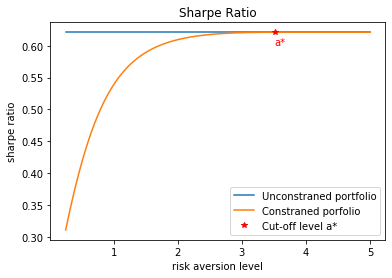

In [172]:
# cycle on a to divide the cases:
sr = []
for i, point in enumerate(a):
    if point < a_s: # constrained case
        sr.append(sr_c[i])
    else: # unconstrained case
        sr.append(sr_u[i])

plt.plot(a,sr_u, label='Unconstraned portfolio')
#plt.plot(a,sr_c)
plt.plot(a,sr, label='Constraned porfolio')
plt.plot(a_s,sr_t,'*', color='r', label='Cut-off level a*')
plt.text(a_s, sr_t-0.0205, 'a*', color='r')
plt.xlabel('risk aversion level')
plt.title('Sharpe Ratio')
plt.ylabel('sharpe ratio')
plt.legend()
plt.show()

# exercise 3

In [2]:
# Berkshire Hathaway 
#BRK = db.raw_sql("select date,ret from crsp.dsf where permno in (17778) and date >='1976-01-01' and date<='2019-12-31'")
ff_100=pd.read_csv("F-F_Research_Data_Factors.csv", sep=",")
ff_5_100=pd.read_csv("F-F_Research_Data_5_Factors_2X3.csv", sep=",")
ff_5=ff_5_100/100
ff=ff_100/100
ff_mom=(pd.read_csv("ffm.CSV", sep=","))/100
average_rf=(np.mean(ff['RF'])*12)
ff.head()
#len(BRK)

#BRK

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,1976.01,0.1216,0.0480,0.0858,0.0047
1,1976.02,0.0032,0.0703,0.0578,0.0034
2,1976.03,0.0232,-0.0117,-0.0004,0.0040
3,1976.04,-0.0149,-0.0003,-0.0006,0.0042
4,1976.05,-0.0134,-0.0124,-0.0132,0.0037


In [3]:
#BRK.to_csv("brk_as5_ex3.csv")
BRK = pd.read_csv("brk_as5_ex3.csv").set_index(["date"]).sort_index()[["ret"]]#.dropna()


## PART B

In [4]:
print("Berkshire Hathaway:")
print("Berkshire Hathaway's annualized excess returns mean:",np.mean(BRK)*252-average_rf)
print("Berkshire Hathaway's execss annualized returns' standard deviation:",np.std(BRK)*np.sqrt(252))
print("Berkshire's annualized returns' Sharpe Ratio:",((np.mean(BRK)*252)-average_rf)/(np.std(BRK)*np.sqrt(252)))
print(" ")
print("Market:")
print("The Market's annualized excess returns mean",np.mean(ff['Mkt-RF'])*12)
print("The Market's annualized excess returns' standard deviation",np.std(ff['Mkt-RF'])*np.sqrt(12))
print("The Market's annualized returns' Sharpe Ratio",np.mean(ff['Mkt-RF'])/np.std(ff['Mkt-RF'])*np.sqrt(12))
print(" ")
print("SMB:")
print("The SMB's annualized excess returns mean",np.mean(ff['SMB'])*12)
print("The SMB's annualized excess returns' standard deviation",np.std(ff['SMB'])*np.sqrt(12))
print("The SMB's annualized returns' Sharpe Ratio",np.mean(ff['SMB'])/np.std(ff['SMB'])*np.sqrt(12))
print(" ")
print("HML:")
print("The HML's annualized excess returns mean",np.mean(ff['HML'])*12)
print("The HML's annualized excess returns' standard deviation",np.std(ff['HML'])*np.sqrt(12))
print("The HML's annualized returns' Sharpe Ratio",np.mean(ff['HML'])/np.std(ff['HML'])*np.sqrt(12))
print(" ")
print("MOM:")
print("The MOM's annualized excess returns mean",np.mean((ff_mom)*12))
print("The MOM's annualized excess returns' standard deviation",np.std(ff_mom)*np.sqrt(12))
print("The MOM's annualized returns' Sharpe Ratio",np.mean(ff_mom)/np.std(ff_mom)*np.sqrt(12))

Berkshire Hathaway:
Berkshire Hathaway's annualized excess returns mean: ret    0.182903
dtype: float64
Berkshire Hathaway's execss annualized returns' standard deviation: ret    0.241099
dtype: float64
Berkshire's annualized returns' Sharpe Ratio: ret    0.758621
dtype: float64
 
Market:
The Market's annualized excess returns mean 0.08009149338374288
The Market's annualized excess returns' standard deviation 0.15118876622527921
The Market's annualized returns' Sharpe Ratio 0.5297450027762137
 
SMB:
The SMB's annualized excess returns mean 0.0231833648393195
The SMB's annualized excess returns' standard deviation 0.10267887836666106
The SMB's annualized returns' Sharpe Ratio 0.22578513914549084
 
HML:
The HML's annualized excess returns mean 0.02913799621928169
The HML's annualized excess returns' standard deviation 0.09994134805358647
The HML's annualized returns' Sharpe Ratio 0.29155096250711465
 
MOM:
The MOM's annualized excess returns mean Mom    0.074268
dtype: float64
The MOM's 

## PART C

In [5]:
BRK.index = pd.DatetimeIndex(BRK.index)
BRK_monthly = BRK.resample("1m").mean()*21 #take the first or last return of each month, or choose another function
BRK_monthly.index = BRK_monthly.index.to_period("m")



In [6]:
np.mean(BRK_monthly)

ret    0.020351
dtype: float64

In [7]:

ff = ff.iloc[9:528]
len(ff)

519

In [8]:
ff_mom = ff_mom.iloc[9:528]
ff_mom.index = ff.index
len(ff_mom)

519

In [9]:
ff_5.index = ff.index
ff_3m=pd.concat([ff, ff_mom], axis=1)
ff_5m=pd.concat([ff_5, ff_mom], axis=1)
ff_5m.columns
R_e_brk=pd.DataFrame((np.array(BRK_monthly['ret']) - np.array(ff['RF'])),columns=['BRK'])
R_e_brk.index = ff.index
R_e_brk_95=R_e_brk.iloc[:231]

In [81]:
def ols(covariates,flag,year,regressand='BRK'):
 if year == 2019:  
    y=R_e_brk['BRK']
    X=flag[covariates]
    X=sm.add_constant(X)
    reg=sm.OLS(y,X).fit()
    print(reg.summary())
    print("The corresponding Information Ratio is",np.divide(reg.params[0],np.sqrt
(reg.mse_resid))*np.sqrt(12))
    return  reg.params[0], reg.mse_resid,reg.params[1:]
 elif year == 1995:
    y= y=R_e_brk_95['BRK']
    X=flag[covariates]
    X=sm.add_constant(X)
    reg=sm.OLS(y,X).fit()
    print(reg.summary())
    print("The corresponding Information Ratio is",np.divide(reg.params[0],np.sqrt(reg.mse_resid))*np.sqrt(12))
 

In [11]:
ols('Mkt-RF',ff_3m,2019)


OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     98.19
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           2.62e-21
Time:                        20:52:56   Log-Likelihood:                 673.82
No. Observations:                 519   AIC:                            -1344.
Df Residuals:                     517   BIC:                            -1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.003      4.234      0.000       0.007       0.018
M

(0.012434271755032167, 0.004380365060052388)

In [12]:
ols(['Mkt-RF','SMB','HML'],ff_3m,2019)

OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     46.79
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           9.38e-27
Time:                        20:52:56   Log-Likelihood:                 691.24
No. Observations:                 519   AIC:                            -1374.
Df Residuals:                     515   BIC:                            -1357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.003      3.834      0.000       0.005       0.017
M

(0.011007696832103581, 0.0041117996537650935)

In [13]:
ols(['Mkt-RF','SMB','HML','Mom'],ff_3m,2019)

OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     35.25
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           4.98e-26
Time:                        20:52:56   Log-Likelihood:                 691.60
No. Observations:                 519   AIC:                            -1373.
Df Residuals:                     514   BIC:                            -1352.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.003      3.602      0.000       0.005       0.016
M

(0.010540236215039661, 0.004114225466774229)

In [111]:
alfa, residual, beta_i =ols(['Mkt-RF','SMB','HML','RMW', 'CMA','Mom'],ff_5m,2019)

OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     24.42
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.78e-25
Time:                        21:48:19   Log-Likelihood:                 694.00
No. Observations:                 519   AIC:                            -1374.
Df Residuals:                     512   BIC:                            -1344.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.003      3.098      0.002       0.003       0.015
M

## Part G

In [112]:

factors=ff_5m.drop(['Unnamed: 0','RF'],axis=1)
mean_factors=pd.DataFrame(factors.mean()).T
varfactors=factors.cov()
varfactors_inv = pd.DataFrame(np.linalg.pinv(varfactors.values), varfactors.columns, varfactors.index)
weights_f=mean_factors.dot(varfactors_inv)
weights_brk=alfa/residual
weights_f
var_f=(weights_f.dot(varfactors)).dot(weights_f.T)
var_brk=weights_brk*residual*weights_brk
var_f=var_f.to_numpy()
weights_fn=weights_f.to_numpy()
beta_i=beta_i.to_numpy()

In [114]:
a=Symbol('a')
aversion=solve(-0.04+(1/a)*(var_brk+var_f),a)

In [176]:
weight_a_brk=weights_brk/aversion
weight_a_f=(weights_fn/aversion) -beta_i*weight_a_brk
weight_a_f=(pd.DataFrame(weight_a_f,weights_f.T.columns, weights_f.T.index))
weight_a_rf=(1-weight_a_f['Mkt-RF']-weight_a_brk*(1-beta_i[0])).T
weight_a_rf=pd.DataFrame(weight_a_rf).T
weight_a_rf.columns=['weight']
weight_a_rf.index=['rf']
weight_a_f=weight_a_f.T
weight_a_f.columns=['weight']
weight_a_brk=pd.DataFrame(weight_a_brk)
weight_a_brk.columns=['weight']
weight_a_brk.index=['BRK']
frames=[weight_a_f,weight_a_rf,weight_a_brk]
weights=pd.concat(frames)

from IPython.core.display import HTML
display(HTML(weights.to_html()))

,weight
Mkt-RF,1.23780360157084
SMB,1.02484529905805
HML,-0.278067668467825
RMW,2.39365325513903
CMA,2.96415348813385
Mom,0.865315587643230
rf,-0.339991760985985
BRK,0.570781741002945


In [ ]:
print('the efficent portfolio is composed by:')

## PART H

In [105]:
ff3_95 = ff_3m.iloc[:231]
ff5_95 = ff_5m.iloc[:231]


In [122]:
print("Berkshire Hathaway:")
print("Berkshire Hathaway's annualized excess returns mean:",np.mean(R_e_brk_95['BRK']*12))
print("Berkshire Hathaway's execss annualized returns' standard deviation:",np.std(R_e_brk_95['BRK'])*np.sqrt(12))
print("Berkshire's annualized returns' Sharpe Ratio:",((np.mean(R_e_brk_95['BRK']))/(np.std(R_e_brk_95['BRK']))*np.sqrt(12)))

Berkshire Hathaway:
Berkshire Hathaway's annualized excess returns mean: 0.3233963700407888
Berkshire Hathaway's execss annualized returns' standard deviation: 0.30606055744907673
Berkshire's annualized returns' Sharpe Ratio: 1.0566417729099127


In [107]:
ols('Mkt-RF',ff3_95,1995)

OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     50.38
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           1.58e-11
Time:                        22:50:24   Log-Likelihood:                 255.70
No. Observations:                 231   AIC:                            -507.4
Df Residuals:                     229   BIC:                            -500.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.005      4.020      0.000       0.011       0.032
M

In [108]:
ols(['Mkt-RF','SMB','HML'],ff3_95,1995)

OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     18.89
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.69e-11
Time:                        22:50:24   Log-Likelihood:                 258.47
No. Observations:                 231   AIC:                            -508.9
Df Residuals:                     227   BIC:                            -495.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.005      3.320      0.001       0.007       0.029
M

In [86]:
ols(['Mkt-RF','SMB','HML','Mom'],ff3_95,1995)

OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     14.10
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           2.74e-10
Time:                        22:44:08   Log-Likelihood:                 258.47
No. Observations:                 231   AIC:                            -506.9
Df Residuals:                     226   BIC:                            -489.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.006      3.170      0.002       0.007       0.029
M

In [87]:
ols(['Mkt-RF','SMB','HML','RMW', 'CMA','Mom'],ff5_95,1995)

OLS Regression Results                            
Dep. Variable:                    BRK   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     9.369
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           3.57e-09
Time:                        22:45:03   Log-Likelihood:                 258.59
No. Observations:                 231   AIC:                            -503.2
Df Residuals:                     224   BIC:                            -479.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.006      3.038      0.003       0.007       0.031
M